In [37]:
import tensorflow as tf
from results.julian.unet_3.custom import *
model_path = "results/julian/unet_3/model.tf"
from load_data_predict import CustomDataGeneratorPredict

Number of samples:  3
Classes: [0 1]


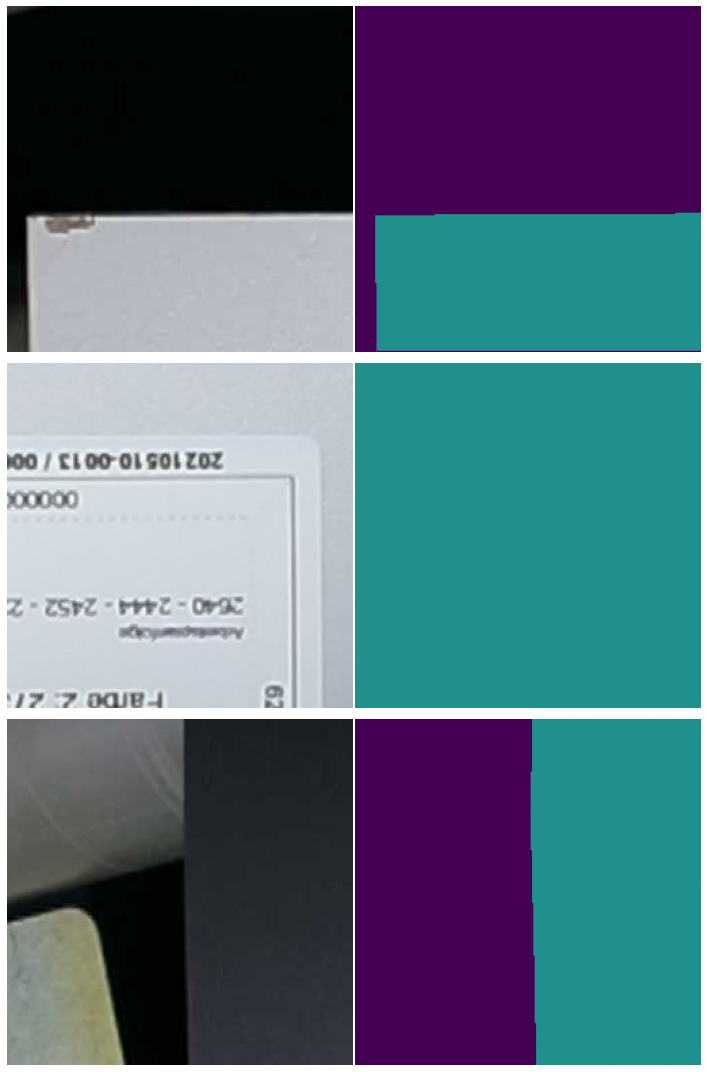

-123.68
151.061
0.0
1.0
[0 1]


In [38]:
img_dir = "PredImages/"
mask_dir = "PredLabels/"
image_extension = ".png"
mask_extension = ".png"
horizontal_split = 12
vertical_split = 1
data_list = [["ckokey6vd002b3g68q5mmclyi", 3, 0],
                    ["ckoklbzlb06qe3g688yq4w56s", 7, 0],
                    ["ckokf3nzs00473g68e456ksi3", 1, 0]]
# ###### Unet big pictures ########
# data_list = [["ckokey6vd002b3g68q5mmclyi", 0, 0],
#                     ["ckoklbzlb06qe3g688yq4w56s", 0, 0],
#                     ["ckokf3nzs00473g68e456ksi3", 0, 0]]

test = CustomDataGeneratorPredict(data_list, img_dir, mask_dir, horizontal_split, vertical_split, image_extension, mask_extension, preprocess_fcn, onelabel)

test.plot_batch()

img, mask = test.__getitem__()
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(test.classes)


In [39]:
model = tf.keras.models.load_model(model_path)

1/1 [==============================] - 0s 243ms/step


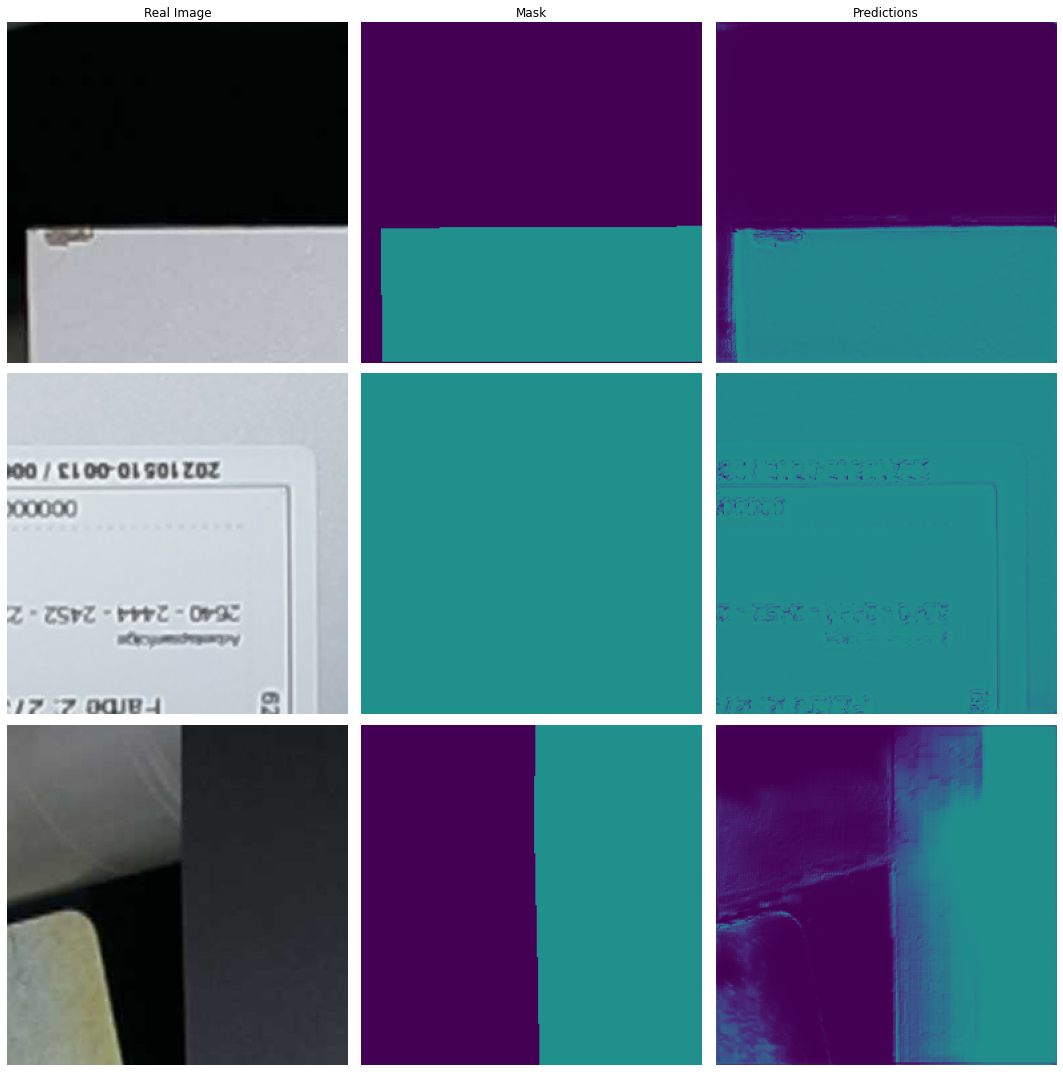

In [40]:
preds = model.predict(x=img, verbose=1)

test.plot_prediction(preds)

In [41]:
output_path = "plots/predictions/encoder_sC"
network_name = "VGG16"
test.save_batch(output_path, net_name=network_name, predictions=preds)